## 신경망 개요
# 경사하강법 (Gradient Descent)

<img src="도표04.jpg" />

- w 값을 줄일것인가 늘릴것인가?
- 기울기를 알면 방향을 잡을 수 있다
$$ w_{new} = w - learning\_rate \cdot slope(w,b) $$
$$ slope(w,b) = {\partial Loss(w,b) \over \partial w} $$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 선형회귀 (속성이 1개일 때) 경사하강법
- 중간층 없이, 입력층과 출력층만 있음
- 활성화함수 없음
- 비용함수는 MSE
- w 와 b 는 한개씩

$$ \hat{y}_i = w \cdot x_i + b \\
Loss = {1 \over N} \sum_i (y_i - \hat{y}_i)^2 \\
= {1 \over N} \sum_i (y_i - (w \cdot x_i + b))^2 $$

$$ {\partial Loss \over \partial w} = -{2 \over N} \sum_i (y_i - \hat{y}_i) \cdot x_i \\
{\partial Loss \over \partial b} = -{2 \over N} \sum_i (y_i - \hat{y}_i) \\
w_{new} = w - lr \cdot {\partial Loss \over \partial w}
= w + lr \cdot {2 \over N} \sum_i (y_i - \hat{y}_i) \cdot x_i \\
b_{new} = b - lr \cdot {\partial Loss \over \partial b}
= b + lr \cdot {2 \over N} \sum_i (y_i - \hat{y}_i) $$

- iris 데이터에서 petal length 와 petal width 에 대해 선형회귀 적용

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [10]:
x = iris.data[:,2]
y = iris.data[:,3]

In [9]:
w = np.random.randn()
b = np.random.randn()
lr = 0.01

In [10]:
pred_y = x*w + b

In [12]:
mse = np.mean((y-pred_y)**2)
mse

75.3868108933482

In [13]:
dw = lr*2/len(y)*np.sum((y-pred_y)*x)
dw

-0.716689601780448

In [14]:
db = lr*2/len(y)*np.sum(y-pred_y)
db

-0.16388913182883127

In [15]:
w = w + dw
b = b + db

In [16]:
pred_y = x*w + b

In [17]:
mse = np.mean((y-pred_y)**2)
mse

31.09122489163435

> 반복 적용

In [20]:
w = np.random.randn()/10
b = np.random.randn()/10
lr = 0.05

pred_y = x*w + b
mse = np.mean((y-pred_y)**2)
costs = [mse]

for i in range(3000):
    pred_y = x*w + b
    dw = lr*2/len(y)*np.sum((y-pred_y)*x)
    db = lr*2/len(y)*np.sum(y-pred_y)
    
    w_new = w + dw
    b_new = b + db
    mse_new = np.mean((y-(x*w_new + b_new))**2)
    if mse_new>=mse: break
        
    w = w_new
    b = b_new
    mse = mse_new
    costs.append(mse)
    
print(i, w, b, mse)

928 0.4164191221911922 -0.36651399943114227 0.042289946319484614


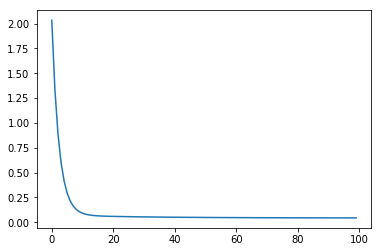

In [21]:
plt.plot(costs[:100])

In [3]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
model.coef_, model.intercept_

(array([0.41641913]), -0.3665140452167275)

### 선형회귀 일반해

$$ \hat{y}_i = \sum_j (w_j \cdot x_{ij}) + b \\
Loss_i = (y_i - \hat{y}_i)^2 \\
 = (y_i - \sum_j (w_j \cdot x_{ij}) - b)^2 \\
Loss = {1 \over N} \sum_i (y_i - \sum_j (w_j \cdot x_{ij}) - b)^2 $$

$$ {\partial Loss \over \partial w_j} = -{2 \over N} \sum_i (y_i - \hat{y}_i) \cdot x_{ij} \\
{\partial Loss \over \partial b} = -{2 \over N} \sum_i (y_i - \hat{y}_i) \\
w_j = w_j - lr \cdot {\partial Loss \over \partial w_j}
= w_j + lr \cdot {2 \over N} \sum_i (y_i - \hat{y}_i) \cdot x_{ij} \\
b = b - lr \cdot {\partial Loss \over \partial b}
= b + lr \cdot {2 \over N} \sum_i (y_i - \hat{y}_i) $$

In [3]:
X = iris.data[:,:3]
y = iris.data[:,3]

In [39]:
w = np.random.randn(3)
b = np.random.randn()
lr = 0.01

In [44]:
pred_y = (X*w).sum(axis=1) + b
pred_y.shape

(150,)

In [47]:
pred_y = X@w + b
pred_y.shape

(150,)

In [48]:
mse = np.mean((y-pred_y)**2)
mse

36.35783717675397

In [50]:
dw = lr*2/len(y)*np.sum((y-pred_y).reshape(-1,1)*X, axis=0)
dw

array([0.71098584, 0.36432653, 0.47519617])

In [51]:
db = lr*2/len(y)*np.sum(y-pred_y)
db

0.11928653535432138

In [52]:
w = w + dw
b = b + db

In [54]:
pred_y = X@w + b

In [55]:
mse = np.mean((y-pred_y)**2)
mse

1.7675265894797012

> 반복 적용

In [15]:
w = np.random.randn(3)
b = np.random.randn()
lr = 0.01

pred_y = X@w + b
mse = np.mean((y-pred_y)**2)
costs = [mse]

for i in range(1000):
    pred_y = X@w + b
    dw = lr* 2/len(y) * np.sum((y-pred_y).reshape(-1,1)*X, axis=0)
    # dw = lr * 2/len(y) * (X.T @ (y-pred_y))
    db = lr * 2/len(y) * np.sum(y-pred_y)
    
    w_new = w + dw
    b_new = b + db
    mse_new = np.mean((y-(X@w_new + b_new))**2)
    if mse_new>=mse: break
        
    w = w_new
    b = b_new
    mse = mse_new
    costs.append(mse)
    
print(i, w, b, mse)

999 [-0.21023885  0.80533536  0.61044339] -2.3443145219604573 0.08915365375016636


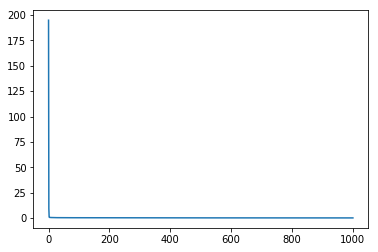

In [18]:
plt.plot(costs)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
model.coef_, model.intercept_

(array([-0.21027133,  0.22877721,  0.52608818]), -0.2487235860244541)

### 로지스틱 회귀 (이진분류)
- 중간층 없음
- 출력층은 뉴런 1개
- 출력층의 활성화함수는 시그모이드함수
- 비용함수는 일반적으로 이진 크로스엔트로피이나 MSE를 적용하여 테스트

In [40]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

$$ \sigma(t) = { 1 \over 1+e^{-t} } \\
\sigma'(t) = { e^{-t} \over (1+e^{-t})^2 } = \sigma (1 - \sigma) $$
<br>

$$ u_i = \sum_j (w_j \cdot x_{ij}) + b \\
\hat{y}_i = \sigma(u_i) \\
Loss_i = (y_i - \hat{y}_i)^2 \\
 = (y_i - \sigma(u_i))^2 \\
Loss = {1 \over N} \sum_i (y_i - \sigma(u_i))^2 $$
<br>

$$ {\partial Loss \over \partial w_j} = -{2 \over N} \sum_i (y_i - \sigma(u_i)) \cdot \sigma'(u_i) \cdot {\partial u_i \over \partial w_j} \\
 = -{2 \over N} \sum_i (y_i - \sigma(u_i)) \cdot \sigma(u_i) \cdot (1 - \sigma(u_i)) \cdot x_{ij} \\
 = -{2 \over N} \sum_i (y_i - \hat{y_i}) \cdot \hat{y_i} \cdot (1 - \hat{y_i}) \cdot x_{ij} \\
{\partial Loss \over \partial b} = -{2 \over N} \sum_i (y_i - \hat{y_i}) \cdot \hat{y_i} \cdot (1 - \hat{y_i}) $$

In [109]:
X = iris.data[:100]
y = iris.target[:100]

X.shape, y.shape

((100, 4), (100,))

In [110]:
w = np.random.randn(4)
b = np.random.randn()

In [111]:
pred_y = sigmoid(X@w + b)
pred_y.shape

(100,)

In [112]:
lr = 0.01

dw = lr * 2/len(X) * (X.T @ ((y-pred_y)*pred_y*(1-pred_y)))
db = lr * 2/len(X) * np.sum((y-pred_y)*pred_y*(1-pred_y))
dw, db

(array([-1.04540191e-03, -7.26159926e-04, -2.56142691e-04, -2.72187355e-05]),
 -0.00021668125017834715)

In [113]:
mse = ((y-pred_y)**2).mean()
mse

0.47618233143481975

In [114]:
w = np.random.randn(4)
b = np.random.randn()
lr = 0.01

pred_y = sigmoid(X@w + b)
mse = ((y-pred_y)**2).sum()/len(y)
costs = [mse]

for i in range(30000):
    pred_y = sigmoid(X@w + b)
    
    dw = lr * 2/len(X) * (X.T @ ((y-pred_y)*pred_y*(1-pred_y)))
    db = lr * 2/len(X) * np.sum((y-pred_y)*pred_y*(1-pred_y))
    
    w += dw
    b += db
    mse = ((y-pred_y)**2).sum()/len(y)
    costs.append(mse)
    
    if i%1000==0: print('%05d> MSE=%.7f' % (i,mse), w, b)
        
print('%05d> MSE=%.7f' % (i,mse), w, b)

00000> MSE=0.4799199 [ 1.50871973 -0.93611847 -0.65157654 -0.58819346] 0.6285219224254666
01000> MSE=0.0411438 [ 0.82754    -1.93527361  0.4280351  -0.07754938] 0.40205513192039266
02000> MSE=0.0163292 [ 0.72562847 -2.14415662  0.80816696  0.09870636] 0.35111611128209524
03000> MSE=0.0100890 [ 0.67153786 -2.24812723  1.00381776  0.19041053] 0.32393097972303997
04000> MSE=0.0073134 [ 0.63464402 -2.31655976  1.13524987  0.25229913] 0.30530273514463435
05000> MSE=0.0057505 [ 0.60658845 -2.36731172  1.23422318  0.29903684] 0.2910888781439368
06000> MSE=0.0047484 [ 0.58391717 -2.40753977  1.31364425  0.33662052] 0.27957325700959595
07000> MSE=0.0040509 [ 0.56487241 -2.44080815  1.38000726  0.36807859] 0.2698801027339648
08000> MSE=0.0035372 [ 0.5484381  -2.46914227  1.43703368  0.39515062] 0.26150192303777475
09000> MSE=0.0031427 [ 0.53397388 -2.49380055  1.48705259  0.41892714] 0.2541181656034515
10000> MSE=0.0028301 [ 0.52105004 -2.5156171   1.53161771  0.44013659] 0.24751330646653866
110

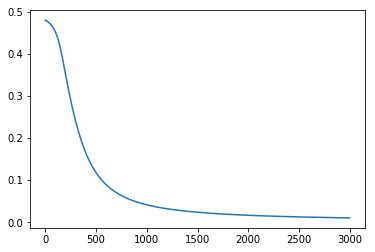

In [115]:
plt.plot(costs[:3000])

- LogisticRegression 적용

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
model.coef_, model.intercept_

(array([[-0.40731745, -1.46092371,  2.24004724,  1.00841492]]),
 array([-0.26048137]))

- 비용함수로 이진 크로스엔트로피 적용

$$ u_i = \sum_j (w_j \cdot x_{ij}) + b \\
\hat{y}_i = \sigma(u_i) \\
Loss_i = - y_i log(\hat{y}_i) - (1-y_i) log(1-\hat{y}_i) \\
Loss = -{1 \over N} \sum_i [y_i log(\hat{y}_i) + (1-y_i) log(1-\hat{y}_i)] $$
<br>

$$ {\partial Loss \over \partial w_j} = -{1 \over N} \sum_i (\frac{y_i}{\hat{y}_i} -
\frac{1-y_i}{1-\hat{y}_i}) \cdot \hat{y}_i \cdot (1-\hat{y}_i) \cdot x_{ij} \\
= -{1 \over N} \sum_i (y_i - \hat{y_i}) \cdot x_{ij} \\
{\partial Loss \over \partial b} = -{1 \over N} \sum_i (y_i - \hat{y_i}) $$

In [37]:
X = iris.data[:100]
y = iris.target[:100]

X.shape, y.shape

((100, 4), (100,))

In [38]:
w = np.random.randn(4)
b = np.random.randn()

In [41]:
pred_y = sigmoid(X@w + b)
pred_y.shape

(100,)

In [42]:
lr = 0.01

dw = lr * 2/len(X) * (X.T @ (y-pred_y))
db = lr * 2/len(X) * np.sum(y-pred_y)
dw, db

(array([-0.04571499, -0.0311767 , -0.0133003 , -0.00220811]),
 -0.009127303737381277)

In [44]:
entropy = -(y*np.log(pred_y)+(1-y)*np.log(1-pred_y)).mean()
entropy

1.276790217881121

In [47]:
w = np.random.randn(4)
b = np.random.randn()
lr = 0.01

pred_y = sigmoid(X@w + b)
entropy = -(y*np.log(pred_y)+(1-y)*np.log(1-pred_y)).mean()
costs = [entropy]

for i in range(30000):
    pred_y = sigmoid(X@w + b)
    
    dw = lr * 2/len(X) * (X.T @ (y-pred_y))
    db = lr * 2/len(X) * np.sum(y-pred_y)
    
    w += dw
    b += db
    entropy = -(y*np.log(pred_y)+(1-y)*np.log(1-pred_y)).mean()
    costs.append(entropy)
    
    if i%1000==0: print('%05d> entropy=%.7f' % (i,entropy), w, b)
        
print('%05d> entropy=%.7f' % (i,entropy), w, b)

00000> entropy=1.5443215 [ 0.42064475  0.01692248  1.05730086 -1.48013366] -0.6963125325372412
01000> entropy=0.0354540 [-0.29796266 -1.36875915  2.65690919 -0.71877403] -0.9725725378002137
02000> entropy=0.0188525 [-0.3777047  -1.65115739  3.09103125 -0.511516  ] -1.0216599320772162
03000> entropy=0.0130211 [-0.42455072 -1.8202467   3.35090444 -0.38521463] -1.0505334561564454
04000> entropy=0.0100178 [-0.45784662 -1.94183967  3.53772736 -0.29332033] -1.0710394555751415
05000> entropy=0.0081766 [-0.48371602 -2.03708027  3.68403382 -0.22069528] -1.0869510148721766
06000> entropy=0.0069277 [-0.50489088 -2.11550433  3.80449585 -0.16045637] -1.099956265791018
07000> entropy=0.0060226 [-0.52282818 -2.18224182  3.90700479 -0.10887704] -1.1109569388862532
08000> entropy=0.0053352 [-0.53839701 -2.24037508  3.9963007  -0.06370631] -1.1204913975233712
09000> entropy=0.0047946 [-0.55215754 -2.2919031   4.07545679 -0.02347765] -1.1289067950024256
10000> entropy=0.0043577 [-0.56449193 -2.3381972   

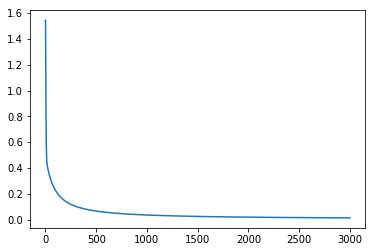

In [48]:
plt.plot(costs[:3000])

### 로지스틱 회귀 (다중분류)
- 활성화 함수 : 소프트맥스
- 비용 함수 : 크로스엔트로피

$$ u_{ik} = \sum_j (x_{ij} \cdot w_{jk}) + b_k \\
\hat{y}_{ik} = \frac{\exp(u_{ik})} {\sum_l \exp(u_{il})} \\
Loss_i = - \sum_k y_{ik} log(\hat{y}_{ik}) \\
Loss = - \frac{1}{N} \sum_i \sum_k y_{ik} log(\hat{y}_{ik}) \\
= - \frac{1}{N} \sum_i log(\hat{y}_{ik}),\ y_{ik}==1 $$
<br>

$$ {\partial Loss \over \partial w_{jk}} = -{1 \over N} \sum_i (y_{ik} - \hat{y_{ik}}) \cdot x_{ij} \\
{\partial Loss \over \partial b_k} = -{1 \over N} \sum_i (y_{ik} - \hat{y}_{ik}) $$

In [19]:
def softmax(t):
    return np.exp(t)/np.sum(np.exp(t), axis=1).reshape(-1,1)

In [20]:
X = iris.data
Y = np.eye(3)[iris.target]

X.shape, Y.shape

((150, 4), (150, 3))

In [21]:
W = np.random.randn(4,3)
b = np.random.randn(3)

In [22]:
pred_Y = softmax(X@W + b)
pred_Y.shape

(150, 3)

In [23]:
lr = 0.01

dW = lr * 2/len(Y) * (X.T @ (Y-pred_Y))
db = lr * 2/len(Y) * np.sum(Y-pred_Y, axis=0)
dW, db

(array([[-0.08349232,  0.03957331,  0.04391901],
        [-0.0382927 ,  0.01846665,  0.01982605],
        [-0.06541299,  0.02839999,  0.03701299],
        [-0.0223466 ,  0.00884   ,  0.0135066 ]]),
 array([-0.01333312,  0.00666666,  0.00666646]))

In [24]:
cross_entropy = -np.sum(Y * np.log(pred_Y))/len(Y)
cross_entropy

11.842826410391885

In [35]:
W = np.random.randn(4,3)
b = np.random.randn(3)
lr = 1

pred_Y = softmax(X@W + b)
cross_entropy = -np.sum(Y * np.log(pred_Y))/len(Y)
costs = [cross_entropy]

for i in range(100000):
    pred_Y = softmax(X@W + b)
    
    dW = lr/len(Y) * (X.T @ (Y-pred_Y))
    db = lr/len(Y) * np.sum(Y-pred_Y, axis=0)
    
    W += dW
    b += db
    cross_entropy = -np.sum(Y * np.log(pred_Y))/len(Y)
    costs.append(cross_entropy)
    
    if i%1000==0: print('%05d> entropy=%.7f' % (i,cross_entropy))
        
print('%05d> entropy=%.7f' % (i,cross_entropy))

00000> entropy=7.4776436
01000> entropy=0.0872601
02000> entropy=0.0743772
03000> entropy=0.0643645
04000> entropy=0.0590567
05000> entropy=0.0583020
06000> entropy=0.0591394
07000> entropy=0.0584239
08000> entropy=0.0567141
09000> entropy=0.0548663
10000> entropy=0.0531448
11000> entropy=0.0515975
12000> entropy=0.0502183
13000> entropy=0.0489900
14000> entropy=0.0478941
15000> entropy=0.0469142
16000> entropy=0.0460356
17000> entropy=0.0452457
18000> entropy=0.0445336
19000> entropy=0.0438898
20000> entropy=0.0433063
21000> entropy=0.0427762
22000> entropy=0.0422937
23000> entropy=0.0418535
24000> entropy=0.0414518
25000> entropy=0.0410855
26000> entropy=0.0407546
27000> entropy=0.0404689
28000> entropy=0.0402777
29000> entropy=0.0402197
30000> entropy=0.0401911
31000> entropy=0.0401646
32000> entropy=0.0401397
33000> entropy=0.0401164
34000> entropy=0.0400944
35000> entropy=0.0400738
36000> entropy=0.0400543
37000> entropy=0.0400360
38000> entropy=0.0400186
39000> entropy=0.0400023


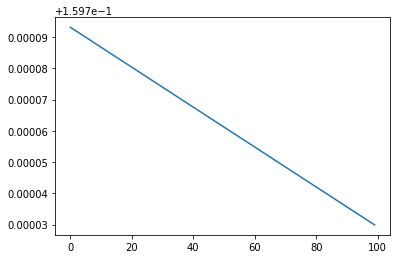

In [31]:
plt.plot(costs[-100:])
#plt.ylim(0,1)

In [36]:
W

array([[  3.60754026,  -1.79274326,  -4.28451576],
       [  7.76726366,   0.36645883,  -6.11109014],
       [-11.50484197,   1.23000011,  10.34862391],
       [ -4.1795993 ,  -6.44643224,  11.16378743]])

In [37]:
b

array([  1.86030801,  19.86462438, -20.52013956])

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()
model.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
model.coef_

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
       [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
       [-1.70752515, -1.53426834,  2.47097168,  2.55538211]])

In [41]:
model.intercept_

array([ 0.26560617,  1.08542374, -1.21471458])